In [1]:
import re
import nltk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import sklearn.model_selection as model_selection

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/shiningflash/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
nrows = 5000

In [3]:
df = pd.read_csv('iseardataset.csv', nrows = nrows)

In [4]:
df = df[['label', 'text']]

In [5]:
df.head(5)

,label,text
0,joy,On days when I feel close to my partner and ot...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...


In [6]:
print('size dataset: {}'.format(df.shape))

size dataset: (5000, 2)


In [7]:
corpus = []

for j in range(0, len(df)):
    df['text'] = df['text'].apply(str)
    review = re.sub('[^a-zA-Z]', ' ', df['text'][j])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [8]:
cv = CountVectorizer(max_features = nrows)
le = LabelEncoder()

In [9]:
y = []

for i in range(len(df)):
    x = 0
    if df['label'][i] == 'fear':
        x = 2
    if df['label'][i] == 'anger':
        x = 3
    if df['label'][i] == 'sadness':
        x = 4
    if df['label'][i] == 'guilt':
        x = 5
    if df['label'][i] == 'disgust':
        x = 6
    if df['label'][i] == 'shame':
        x = 7
    y.append(x)

In [10]:
X = cv.fit_transform(corpus).toarray()

In [11]:
y = le.fit_transform(y)

In [12]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6])

In [13]:
y[0]

0

In [14]:
X = X.transpose()
print(X.shape[0], y.shape[0])

5000 5000


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [16]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [17]:
y_pred = model.predict(X_test)

In [18]:
print(y_pred[:10])

[5 3 3 1 4 4 4 5 5 0]


In [19]:
print('Accuracy for dataset: {}%'.format((accuracy_score(y_test, y_pred)*100)))

Accuracy for dataset: 14.16%


for IMDB Dataset:


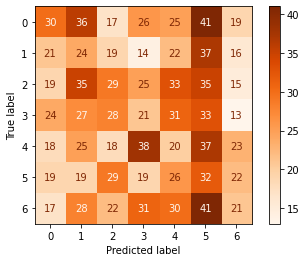

In [20]:
print('for iseardataset Dataset:')
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Oranges)